In [2]:
pip list

Package              Version
-------------------- -----------
argon2-cffi          21.3.0
argon2-cffi-bindings 21.2.0
asttokens            2.0.8
attrs                22.1.0
backcall             0.2.0
beautifulsoup4       4.11.1
bleach               5.0.1
cffi                 1.15.1
colorama             0.4.5
contourpy            1.0.5
cycler               0.11.0
debugpy              1.6.3
decorator            5.1.1
defusedxml           0.7.1
entrypoints          0.4
executing            1.0.0
fastjsonschema       2.16.1
fonttools            4.37.2
importlib-metadata   4.12.0
importlib-resources  5.9.0
ipykernel            6.15.3
ipython              8.5.0
ipython-genutils     0.2.0
ipywidgets           8.0.2
jedi                 0.18.1
Jinja2               3.1.2
jsonschema           4.16.0
jupyter              1.0.0
jupyter_client       7.3.5
jupyter-console      6.4.4
jupyter-core         4.11.1
jupyterlab-pygments  0.2.2
jupyterlab-widgets   3.0.3
jupyterthemes        0.20.0
kiwisolv

In [3]:
## You can do all of this in jupyter notebook

# Install jupyterthemes
!pip install jupyterthemes

# Show available themes
!jt -l

# Use theme

# e.g. !jt -t monokai

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [4]:
!jt -t monokai

# Task 2: Understand the problem statement and business case

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot 
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [6]:
tweets_df = pd.read_csv('twitter.csv')

In [7]:
tweets_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [8]:
# Getting the info of our data:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [9]:
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [10]:
# We want to visualize the tweets
tweets_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [11]:
# axis = 1 indicating to drop the entire column
tweets_df = tweets_df.drop(['id'],axis=1)

# Task 3: Explore the dataset

<AxesSubplot: >

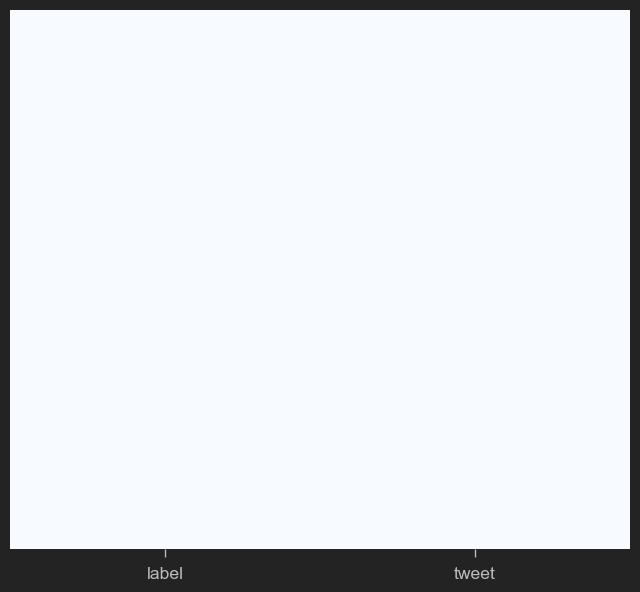

In [12]:
# Trying to chekc if there is a null elements or not
sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<AxesSubplot: title={'center': 'label'}>]], dtype=object)

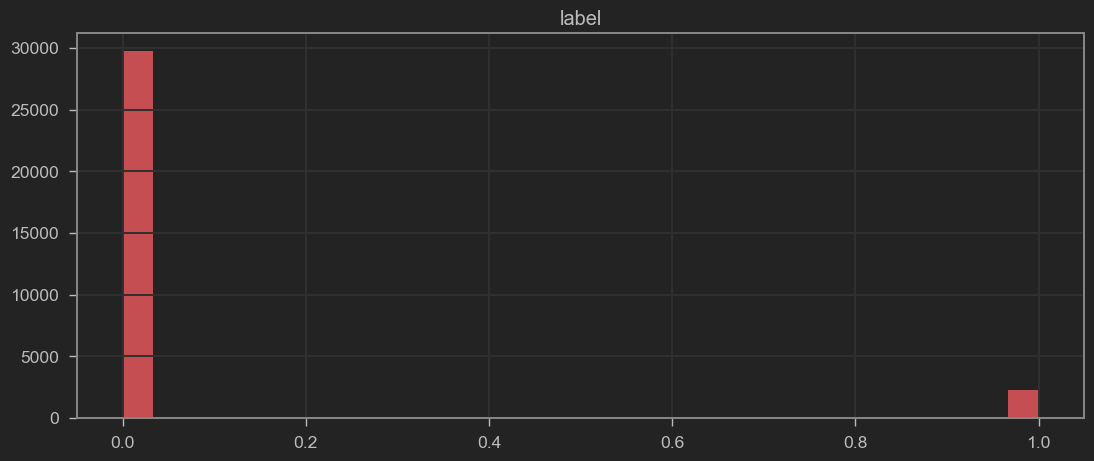

In [13]:
# Basically showing how is the dataset is, based on the score. In here the data is skewed. only small number is - which is the 1.0
tweets_df.hist(bins = 30, figsize = (13,5), color = 'r')

### plot similar figure but using the seaborn countplot:

<AxesSubplot: ylabel='count'>

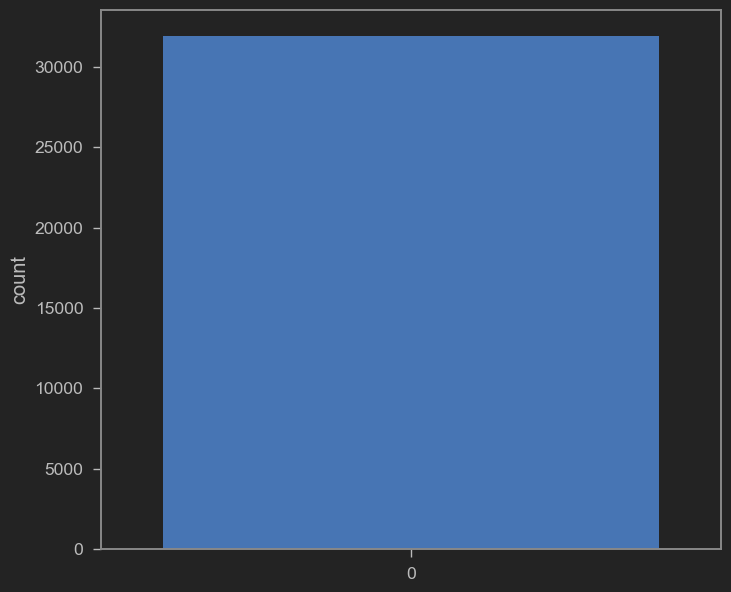

In [14]:
sns.countplot(tweets_df['label'], label='Count')

In [15]:
tweets_df['label'].describe()

count    31962.000000
mean         0.070146
std          0.255397
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: label, dtype: float64

In [16]:
# make a new column length of the tweets
tweets_df['length'] = tweets_df['tweet'].apply(len)

In [17]:
tweets_df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


<AxesSubplot: ylabel='Frequency'>

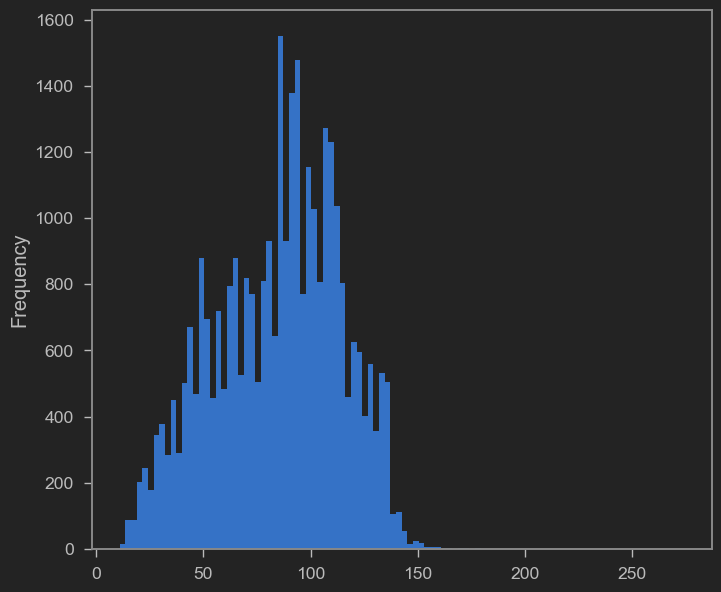

In [18]:
# I want to see the distribution on the length of the tweet.
#basically creating a histogram on the length of tweets.
tweets_df['length'].plot(bins=100, kind='hist')

In [19]:
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [20]:
#let's see the shortest message
#basically accessing the one with the 11 chars.
tweets_df[tweets_df['length']==11]['tweet'].iloc[0]

'i love you '

### challenge: see the message with the avg length

In [21]:
tweets_df[tweets_df['length']==84]['tweet'].iloc[0]
#LOL

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

In [26]:
#Getting the positive tweets
positive = tweets_df[tweets_df['label']==0]

In [27]:
#Getting the negative tweets
negative = tweets_df[tweets_df['label']==1]

In [28]:
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


In [31]:
positive


,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [32]:
type(positive)

pandas.core.frame.DataFrame

# Task 4: Plot the wordcloud

In [33]:
#convert to a list datatypes
sentences = tweets_df['tweet'].tolist()

In [35]:
len(sentences)

31962

In [36]:
# we are combining the sentences into 1 string
sentences_as_one_string = " ".join(sentences)

In [37]:
!pip install WordCloud

     -------------------------------------- 152.9/152.9 kB 9.5 MB/s eta 0:00:00


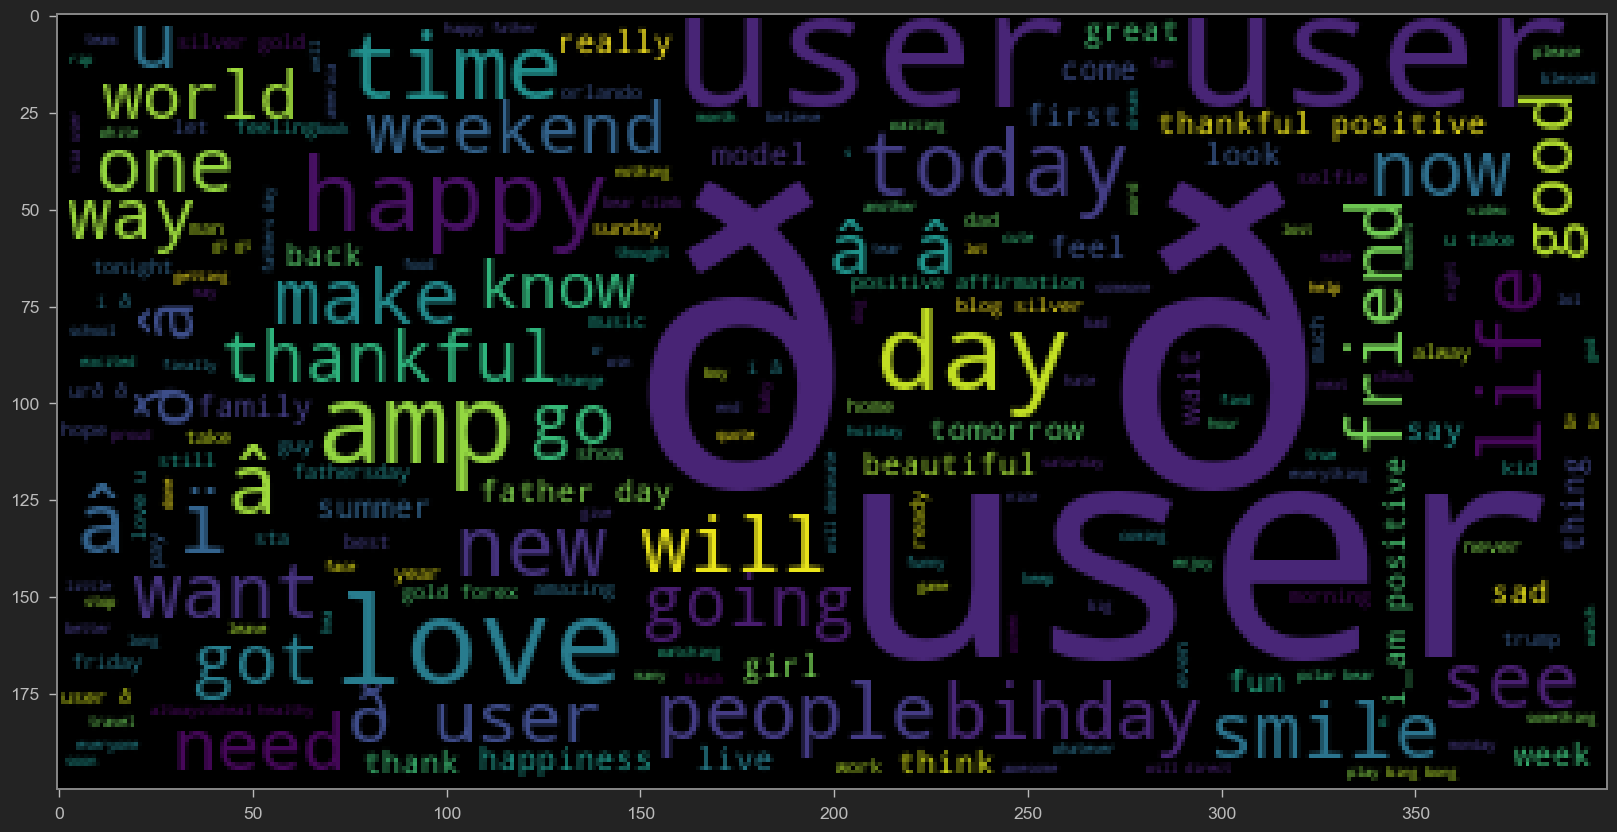

In [38]:
from wordcloud import WordCloud

#creating the figure size
plt.figure(figsize=(20,20))
#basically this is to visualize the wordcloud.
plt.imshow(WordCloud().generate(sentences_as_one_string))

### Mini Challenge: plot the wordcloud for the negative data

In [40]:
negative_list = negative['tweet'].tolist()

In [41]:
negative_sentences_as_one_string = " ".join(negative_list)

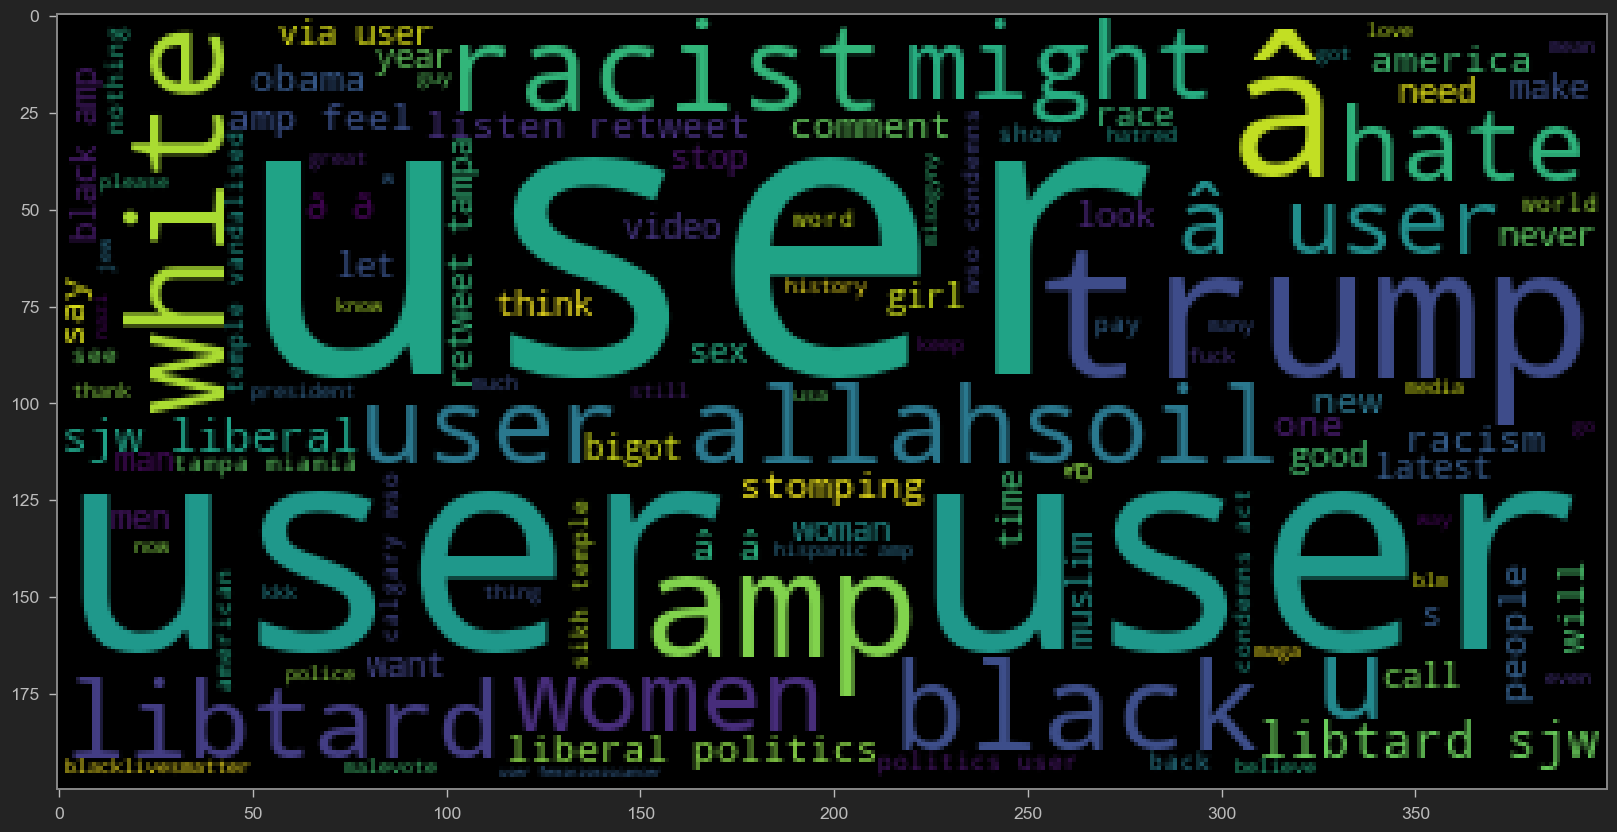

In [42]:
plt.figure(figsize=(20,20))
#basically this is to visualize the wordcloud.
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

# Task 5: Perform Data Cleaning - Remove Punctuation

In [44]:
import string 
string.punctuation
#showing all the punctuation below inside the string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
Test = 'Good morning beautiful people!!!@#!##!@#@# :)... I am having fun learni!#!#@%#$&!ng Machine Learning and Artificial Intelligence'

In [50]:
#getting the non punctuation character. with python oneliner magic!
Test_punc_removed = [ char for char in Test if char not in string.punctuation ]

In [51]:
Test_punc_removed

['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'u',
 'n',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'M',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'L',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'A',
 'r',
 't',
 'i',
 'f',
 'i',
 'c',
 'i',
 'a',
 'l',
 ' ',
 'I',
 'n',
 't',
 'e',
 'l',
 'l',
 'i',
 'g',
 'e',
 'n',
 'c',
 'e']

In [54]:
Test_punc_removed_join = ''.join(Test_punc_removed)

In [55]:
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Machine Learning and Artificial Intelligence'

### Challenge: create the same but without the magic 

In [58]:
test_punc_removed = []
for char in Test: 
    if char not in string.punctuation:
        test_punc_removed.append(char)

test_punc_removed_join = ''.join(test_punc_removed)
test_punc_removed_join

'Good morning beautiful people  I am having fun learning Machine Learning and Artificial Intelligence'

# Task 7: Removing the stop words! 

In [60]:
!pip install nltk

     ---------------------------------------- 1.5/1.5 MB 15.8 MB/s eta 0:00:00
     -------------------------------------- 267.7/267.7 kB 8.3 MB/s eta 0:00:00
     ---------------------------------------- 78.5/78.5 kB ? eta 0:00:00
     ------------------------------------- 298.0/298.0 kB 18.0 MB/s eta 0:00:00
  Using cached click-8.1.3-py3-none-any.whl (96 kB)


In [61]:
import nltk #natural language tool kit
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dymas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each